<a href="https://colab.research.google.com/github/aezamsos/data-statistics-analytics-python/blob/main/Week2_2ISRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spectral Data Shape: (8, 2094)


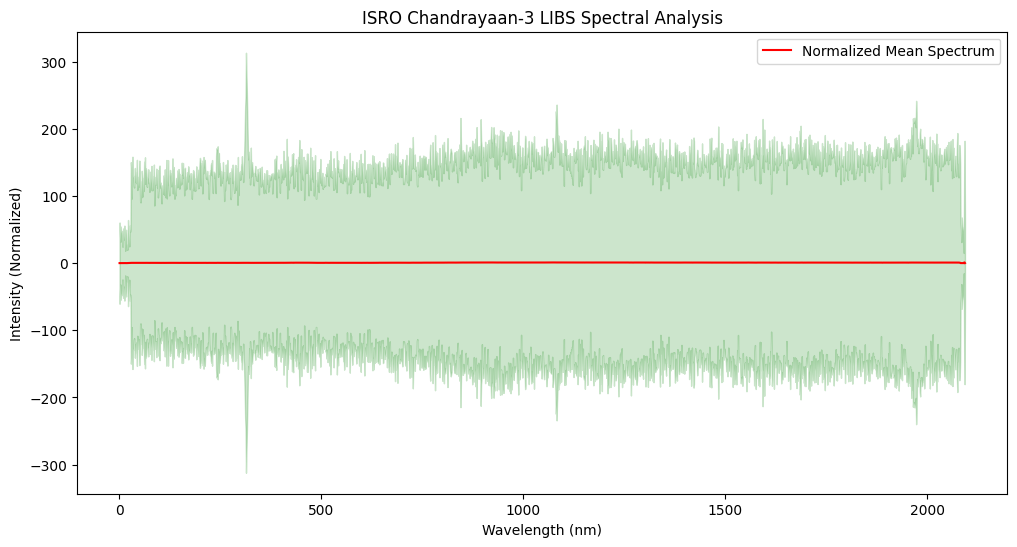

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ch3_lib_002_20230825T104221_00_l0.csv")

spectral_data = df.iloc[:, 6:2100].values

print("Spectral Data Shape:", spectral_data.shape)

mean_spectrum = np.mean(spectral_data, axis=0)

std_dev_spectrum = np.std(spectral_data, axis = 0)

norm_spectrum = (mean_spectrum - np.min(mean_spectrum)) / (np.max(mean_spectrum) - np.min(mean_spectrum))

wavelengths =  np.arange(1, 2095)
# Plot the spectral data
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, norm_spectrum, label="Normalized Mean Spectrum", color='r')
plt.fill_between(wavelengths, norm_spectrum - std_dev_spectrum, norm_spectrum + std_dev_spectrum, alpha=0.2, color='green')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Normalized)")
plt.title("ISRO Chandrayaan-3 LIBS Spectral Analysis")
plt.legend()
plt.show()

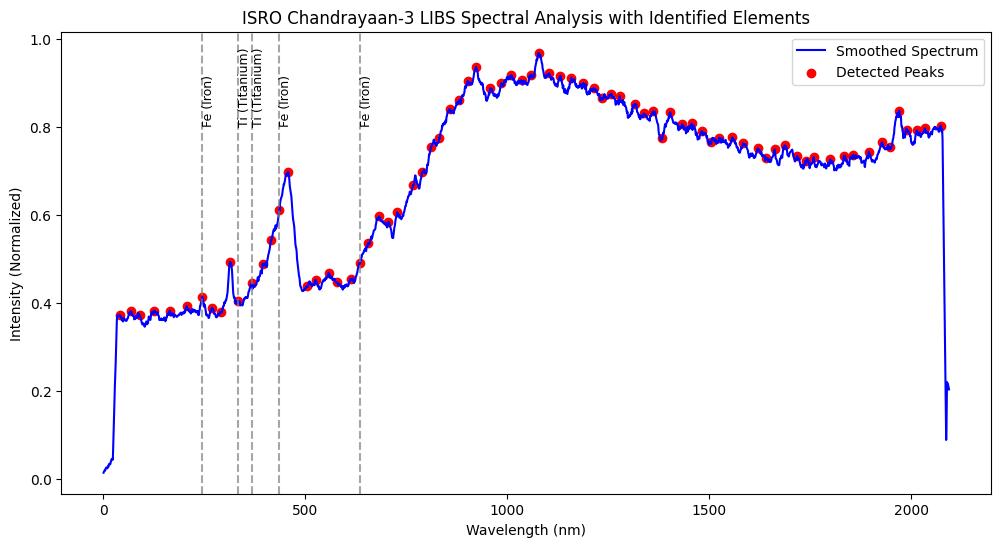

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


df = pd.read_csv("ch3_lib_002_20230825T104221_00_l0.csv")

spectral_data = df.iloc[:, 6:2100].values
mean_spectrum = np.mean(spectral_data, axis=0)

wavelengths = np.arange(1, 2095)  # Adjusted to match smoothed spectrum length

norm_spectrum = (mean_spectrum - np.min(mean_spectrum)) / (np.max(mean_spectrum) - np.min(mean_spectrum))

window_size = 10
smoothed_spectrum = np.convolve(norm_spectrum, np.ones(window_size) / window_size, mode='same')

reference_peaks = {
    "Fe (Iron)": [248, 373, 404, 438, 492, 532, 636],
    "Ti (Titanium)": [336, 368, 390, 430, 498, 546],
    "O₂ (Oxygen)": [777, 844, 1302]
}

peaks, _ = find_peaks(smoothed_spectrum, height=0.2, distance=20)
detected_wavelengths = wavelengths[peaks]

matched_peaks = {}
for element, ref_vals in reference_peaks.items():
    matched_peaks[element] = [w for w in detected_wavelengths if any(abs(w - rv) < 5 for rv in ref_vals)]

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, smoothed_spectrum, label="Smoothed Spectrum", color='b')

plt.scatter(detected_wavelengths, smoothed_spectrum[peaks], color='r', label="Detected Peaks")

for element, peak_list in matched_peaks.items():
    for peak in peak_list:
        plt.axvline(peak, color='gray', linestyle='dashed', alpha=0.7)
        plt.text(peak, 0.8, element, rotation=90, verticalalignment='bottom', fontsize=9, color='black')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Normalized)")
plt.title("ISRO Chandrayaan-3 LIBS Spectral Analysis with Identified Elements")
plt.legend()
plt.show()
